Importing Data & Libraries

In [29]:
# Import necessary libraries and modules

#Iheoma imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
plt.style.use('ggplot')

# #Luca's imports
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.linear_model import LinearRegression
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.decomposition import PCA

# #Charlotte's imports
# pip install scikit-learn

# Import files into our working environment
df_2016 = pd.read_csv('properties_2016.csv')
df_2017 = pd.read_csv('properties_2017.csv')
zillow_data_dict = pd.read_excel('zillow_data_dictionary.xlsx')

# Replace column names with snake case for ease of manipulation
df_2016.columns=df_2016.columns.str.replace(" ","_").str.lower()
df_2017.columns=df_2017.columns.str.replace(" ","_").str.lower()
zillow_data_dict.columns=zillow_data_dict.columns.str.replace(" ","_").str.lower()

# # Merge the two dataframes & drop duplicates

df = pd.concat([df_2016, df_2017], axis=0).drop_duplicates()

# Set the display options to show full text wrapping
pd.set_option('display.max_colwidth', None)

# display(zillow_data_dict)


<ipython-input-29-a88405a1abc0>:25: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2016 = pd.read_csv('properties_2016.csv')
<ipython-input-29-a88405a1abc0>:26: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2017 = pd.read_csv('properties_2017.csv')


In [33]:
# # prompt: show a sample of non null values of column basementsqft

# df['basementsqft'].dropna().sample(20)


149065      160.0
1473348     454.0
878014      587.0
2520969      20.0
2849218     388.0
535797      154.0
1413995      36.0
1567032     512.0
2565223     120.0
742486      116.0
520757      168.0
580414      512.0
238143      528.0
520794      440.0
2736015     272.0
1487519     504.0
1636309     840.0
2953455     473.0
2252252     585.0
1178534    1023.0
Name: basementsqft, dtype: float64

Data Cleaning

In [34]:
# Determining list of variables to drop

# Dropping'taxdelinquencyflag' 'taxdelinquencyyear' as they don't impact our model
# Dropping other location data not needed 'regionidneighborhood' 'regionidcity' 'regionidcounty'
# -> will keep zipcode but need to remove data that is missing this info
# 'rawcensustractandblock','censustractandblock','latitude','longitude'
# dropping all extra zoning data 'propertyzoningdesc','propertycountylandusecode'
# dropping other tax columns'landtaxvaluedollarcnt','structuretaxvaluedollarcnt', 'taxamount'
# redunant size categories,'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50','finishedsquarefeet6'
# redundant bathroom references 'threequarterbathnbr','fullbathcnt'
# objects/flag/qualitative, 'hashottuborspa', 'buildingqualitytypeid', 'buildingclasstypeid', 'fireplaceflag','architecturalstyletypeid'
# pool size redundancy 'pooltypeid10','pooltypeid2','pooltypeid7','poolsizesum'
drop_list = ['taxdelinquencyflag','taxdelinquencyyear','taxamount','landtaxvaluedollarcnt','structuretaxvaluedollarcnt','yardbuildingsqft26','typeconstructiontypeid','storytypeid','regionidneighborhood','regionidcity','regionidcounty','censustractandblock','rawcensustractandblock','propertyzoningdesc','propertylandusetypeid','propertycountylandusecode','pooltypeid7','pooltypeid2','pooltypeid10','longitude','latitude','heatingorsystemtypeid','hashottuborspa','fullbathcnt','fireplaceflag','finishedsquarefeet50','finishedsquarefeet15','finishedsquarefeet13','finishedsquarefeet12','finishedsquarefeet6','threequarterbathnbr','decktypeid','buildingclasstypeid','buildingqualitytypeid','architecturalstyletypeid','airconditioningtypeid']
df.drop(drop_list, axis=1, inplace=True)

#Handling Missing Data
# Dropping rows with null for'parcelid','bathroomcnt','bedroomcnt','fips','taxvaluedollarcnt','assessmentyear'
df.dropna(subset=['parcelid', 'bathroomcnt', 'bedroomcnt', 'fips', 'taxvaluedollarcnt', 'assessmentyear', 'regionidzip'], inplace=True)

missing_zero_columns = ['basementsqft','fireplacecnt','garagecarcnt','garagetotalsqft','poolcnt','poolsizesum','yardbuildingsqft17']
df[missing_zero_columns] = df[missing_zero_columns].fillna(0)

missing_one_columns = ['unitcnt','numberofstories']
df[missing_one_columns] = df[missing_one_columns].fillna(1)



In [35]:
# # prompt: If dataframe row is missing data in all 3 columns lotsizesquarefeet, calulatedfinishedsquarefeet , finishedfloor1squarefeet drop from dataframe

# import numpy as np
# def replace_missing_values(df):
#     for i in range(len(df)):
#         if np.isnan(df.loc[i, 'lotsizesquarefeet']) and np.isnan(df.loc[i, 'calculatedfinishedsquarefeet']) and np.isnan(df.loc[i, 'finishedfloor1squarefeet']):
#             df.drop(i, inplace=True)
#     return df

# df = replace_missing_values(df)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [23]:
# # prompt: for rows missing lotsizesquarefeet, or calulatedfinishedsquarefeet or finishedfloor1squarefeet replace missing value with any of these 3 values, if present.

# import numpy as np
# def replace_missing_values(df):
#   for i in range(len(df)):
#     if np.isnan(df.loc[i, 'lotsizesquarefeet']) and np.isnan(df.loc[i, 'calculatedfinishedsquarefeet']) and np.isnan(df.loc[i, 'finishedfloor1squarefeet']):
#       df.drop(i, inplace=True)
#     elif np.isnan(df.loc[i, 'lotsizesquarefeet']):
#       df.loc[i, 'lotsizesquarefeet'] = df.loc[i, 'calculatedfinishedsquarefeet'] if not np.isnan(df.loc[i, 'calculatedfinishedsquarefeet']) else df.loc[i, 'finishedfloor1squarefeet']
#     elif np.isnan(df.loc[i, 'calculatedfinishedsquarefeet']):
#       df.loc[i, 'calculatedfinishedsquarefeet'] = df.loc[i, 'lotsizesquarefeet'] if not np.isnan(df.loc[i, 'lotsizesquarefeet']) else df.loc[i, 'finishedfloor1squarefeet']
#     elif np.isnan(df.loc[i, 'finishedfloor1squarefeet']):
#       df.loc[i, 'finishedfloor1squarefeet'] = df.loc[i, 'lotsizesquarefeet'] if not np.isnan(df.loc[i, 'lotsizesquarefeet']) else df.loc[i, 'calculatedfinishedsquarefeet']

#   return df

# df = replace_missing_values(df)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [17]:
# prompt: for each column in dataframe except taxvaluedollarcnt determine how to replace null values

for column in df.columns:
  if column != 'taxvaluedollarcnt':
    if df[column].dtype == 'object':
      df[column].fillna('Unknown', inplace=True)
    elif df[column].dtype in ['int64', 'float64']:
      df[column].fillna(df[column].mean(), inplace=True)



In [ ]:
# sns.pairplot(df, x_vars=['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet'], y_vars=['taxvaluedollarcnt'], color='fips')
# plt.show()

Refining EDA

In [ ]:
# prompt: visually represent the relationship between taxvaluedollarcnt and all other variables using pairplot and color data by fips value
sns.pairplot(df, x_vars=['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'yearbuilt'], y_vars=['taxvaluedollarcnt'], hue='fips', height=3, aspect=0.8, kind='reg')
plt.show()


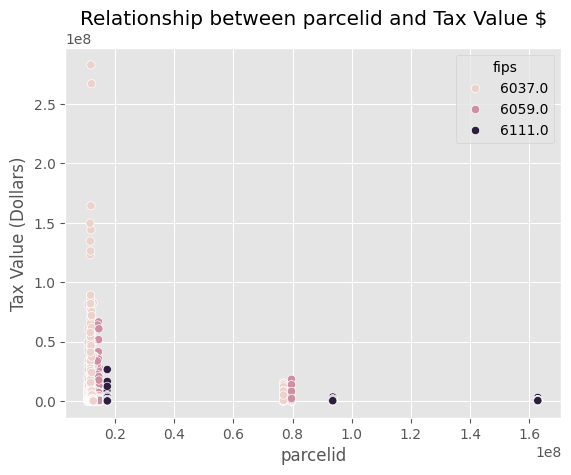

KeyboardInterrupt: 

In [ ]:

for col in df.columns:
  if col != 'taxvaluedollarcnt':
    sns.scatterplot(x=col, y='taxvaluedollarcnt', data=df, hue='fips')
    plt.xlabel(col)
    plt.ylabel('Tax Value (Dollars)')
    plt.title(f'Relationship between {col} and Tax Value $')
    plt.show()
